In [2]:
import pandas as pd
df=pd.read_csv("train.csv", index_col='Season', parse_dates=True)
df.head(5)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
Season,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2017-01-01,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2017-01-01,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2017-01-01,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2017-01-01,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [6]:
df.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


What is the relationship between week into the season and speed in yards/second while considering  playing at 'home' and 'away'?

(0.0, 10.0)

<Figure size 1008x432 with 0 Axes>

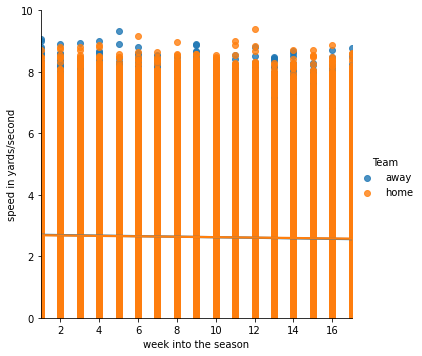

In [207]:
plt.figure(figsize=(14,6))
#plt.title("Speed vs week in the season")
sns.lmplot(x='Week', y= 'S', hue='Team', data=df)
plt.ylabel('speed in yards/second')
plt.xlabel('week into the season')
plt.ylim(0, 10)

In [ ]:
The speed is pretty constant. However, it rises to the highest level into weeks 5 and 12 during the away and home games respectively. 

Are the acceleration and speed constant throughout the seasons?

(0.0, 5.0)

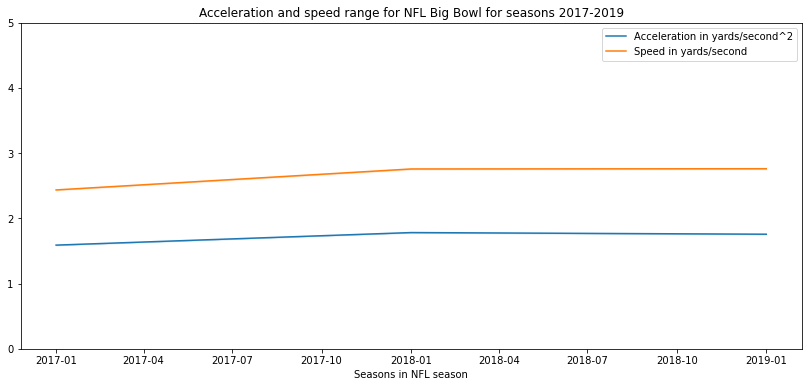

In [148]:
plt.figure(figsize=(14,6))
plt.title("Acceleration and speed range for NFL Big Bowl for seasons 2017-2019")
sns.lineplot(data=df['A'], label='Acceleration in yards/second^2')
sns.lineplot(data=df['S'], label='Speed in yards/second')
plt.xlabel('Seasons in NFL season')
plt.ylim(0, 5)


The highest acceleration and speed were achieved in the 2018 season.

Player weight relationship ?

Text(0.5, 0, 'Player weight (lbs)')

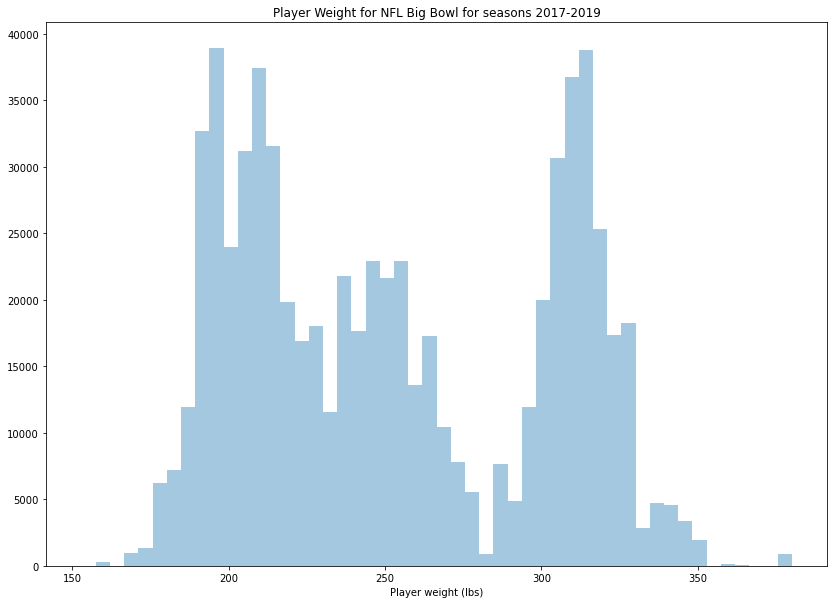

In [200]:
plt.figure(figsize=(14,10))
plt.title("Player Weight for NFL Big Bowl for seasons 2017-2019")
sns.distplot(a=df['PlayerWeight'],kde=False)
plt.xlabel('Player weight (lbs)')


The weight of players varies from 160 lbs to 350 lbs. It generally keeps around 175, 225, and 325 lbs for low, medium, and heavy built individuals.

Temperature variations for various seasons

Text(0.5, 0, 'Seasons in NFL season')

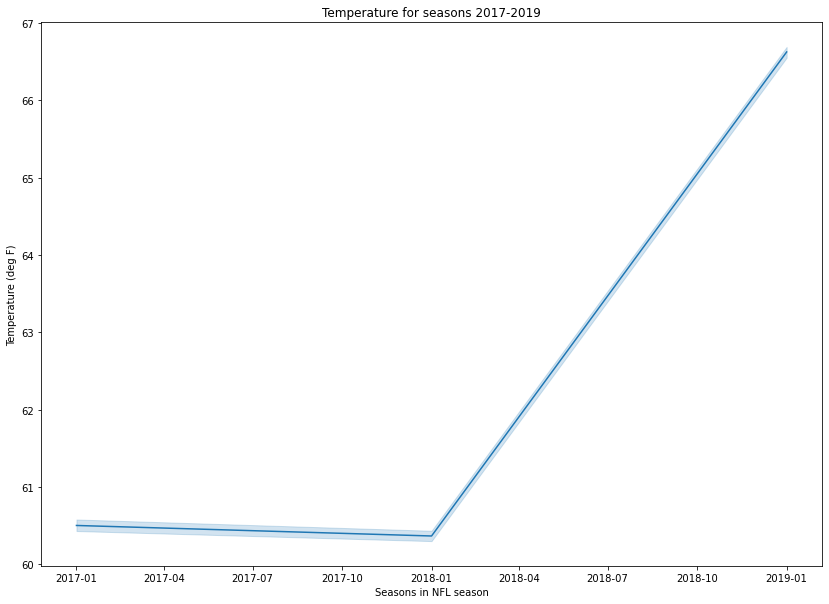

In [6]:
plt.figure(figsize=(14,10))
plt.title("Temperature for seasons 2017-2019")
sns.lineplot(y=df['Temperature'],x=df.index)

plt.ylabel('Temperature (deg F)')
plt.xlabel('Seasons in NFL season')

The temperature was a bit higher in the 2019 season but other than that the temperature remains approximately constant throughout the other two seasons.

Is the perforamnce any better at home games ?

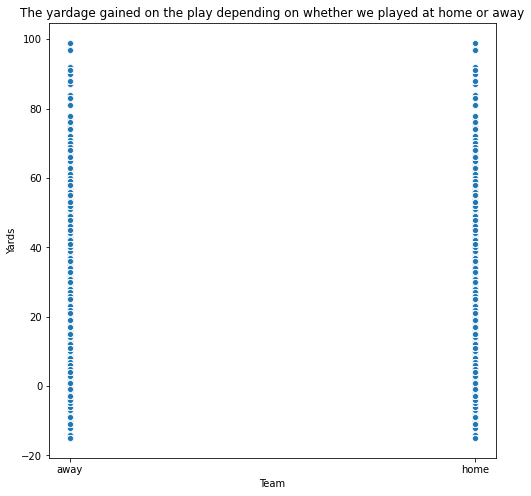

In [166]:
plt.figure(figsize=(8,8))
plt.title("The yardage gained on the play depending on whether we played at home or away")
sns.scatterplot(y=df['Yards'],x=df['Team'])

The performance is approximately the same depending no matter whether they placed at home or away.

Is there any relationship between Temperature and Humidity ?

<Figure size 1008x720 with 0 Axes>

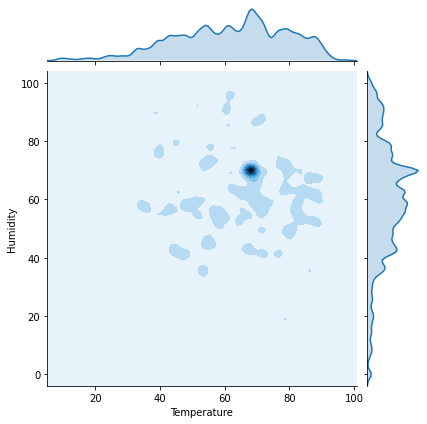

<Figure size 1008x720 with 0 Axes>

In [186]:
sns.jointplot(x=df['Temperature'], y=df['Humidity'], kind="kde")
#plt.title("Temperature vs Humidity")
#plt.xlabel("Temperature (deg F)")
plt.figure(figsize=(14,10))


This wonderful two-dimensional KDE plot that shows variation between Humidity and Temperature during the playoff season.

Yards vs Week into the season

Text(0.5, 1.0, 'Yards vs Week into the season')

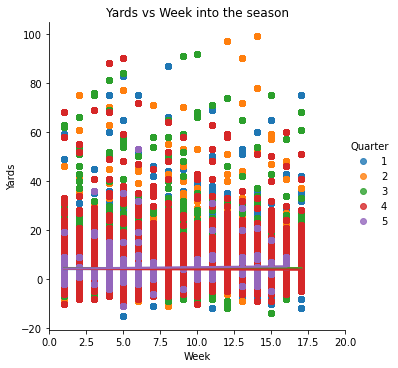

In [201]:
sns.lmplot(x='Week', y="Yards", hue ='Quarter', data=df)
plt.xlim(0, 20)
plt.title("Yards vs Week into the season")

The yards increased around week 15 into the season. The highest yeards were in quarter 2,3,and 4. The lowest yeards were in quarter 5.

Yarline range

Text(0.5, 1.0, 'Yardline range')

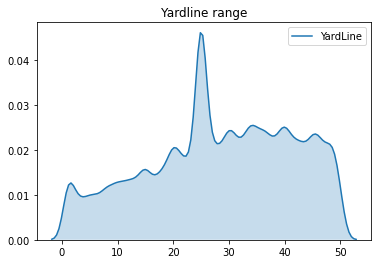

In [195]:
sns.kdeplot(data=df['YardLine'], shade=True)
plt.title("Yardline range")

The yardline varies from 0 to 50. The yardline usually ranges around 28.